In [2]:
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import fbprophet

%matplotlib inline

In [5]:
data = pd.read_csv('time_series.csv')
data.head()

,Date,values
0,2003-10-02,1465.1
1,2003-10-03,1465.1
2,2003-10-04,1465.1
3,2003-10-05,1465.1
4,2003-10-08,1465.1


In [8]:
data.columns = ['ds', 'y']

In [6]:
data.head()

,Date,values
0,2003-10-02,1465.1
1,2003-10-03,1465.1
2,2003-10-04,1465.1
3,2003-10-05,1465.1
4,2003-10-08,1465.1


In [9]:
data['y'] = np.log(data['y'])

In [10]:
data.head()

,ds,y
0,2003-10-02,7.289679
1,2003-10-03,7.289679
2,2003-10-04,7.289679
3,2003-10-05,7.289679
4,2003-10-08,7.289679


In [11]:
from fbprophet import Prophet
p = Prophet()
p.fit(data)


INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
D:\Users\free\Anaconda3\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
future = p.make_future_dataframe(periods=100)
future.tail()


,ds
3940,2020-05-06
3941,2020-05-07
3942,2020-05-08
3943,2020-05-09
3944,2020-05-10


In [13]:
print(data.shape)

(3845, 2)


In [14]:
print(future.shape)

(3945, 1)


In [15]:
future = p.make_future_dataframe(periods=10, freq = 'M')

In [16]:
forecast = p.predict(future)

In [17]:
forecast.head()

,ds,trend,trend_lower,trend_upper,yhat_lower,yhat_upper,seasonal,seasonal_lower,seasonal_upper,seasonalities,seasonalities_lower,seasonalities_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,yhat
0,2003-10-02,7.382670,7.382670,7.382670,7.178307,7.511088,-0.040613,-0.040613,-0.040613,-0.040613,-0.040613,-0.040613,-0.012736,-0.012736,-0.012736,-0.027877,-0.027877,-0.027877,7.342057
1,2003-10-03,7.383457,7.383457,7.383457,7.178741,7.501325,-0.040044,-0.040044,-0.040044,-0.040044,-0.040044,-0.040044,-0.013720,-0.013720,-0.013720,-0.026324,-0.026324,-0.026324,7.343413
2,2003-10-04,7.384243,7.384243,7.384243,7.175534,7.513802,-0.038519,-0.038519,-0.038519,-0.038519,-0.038519,-0.038519,-0.013723,-0.013723,-0.013723,-0.024796,-0.024796,-0.024796,7.345724
3,2003-10-05,7.385029,7.385029,7.385029,7.173269,7.517521,-0.035030,-0.035030,-0.035030,-0.035030,-0.035030,-0.035030,-0.011699,-0.011699,-0.011699,-0.023330,-0.023330,-0.023330,7.349999
4,2003-10-08,7.387388,7.387388,7.387388,7.184703,7.537655,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.032289,-0.012642,-0.012642,-0.012642,-0.019646,-0.019646,-0.019646,7.355099


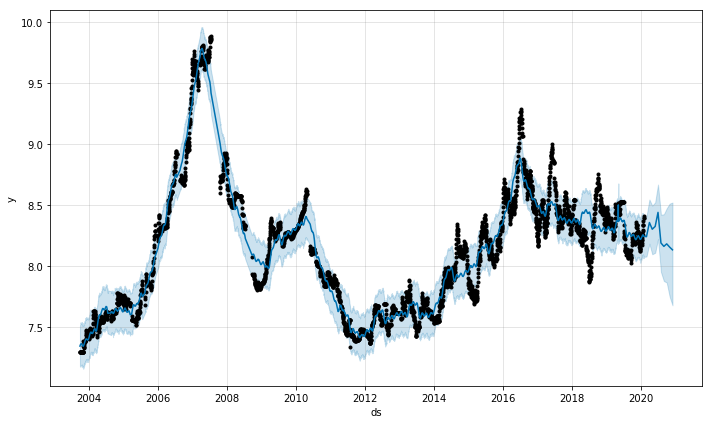

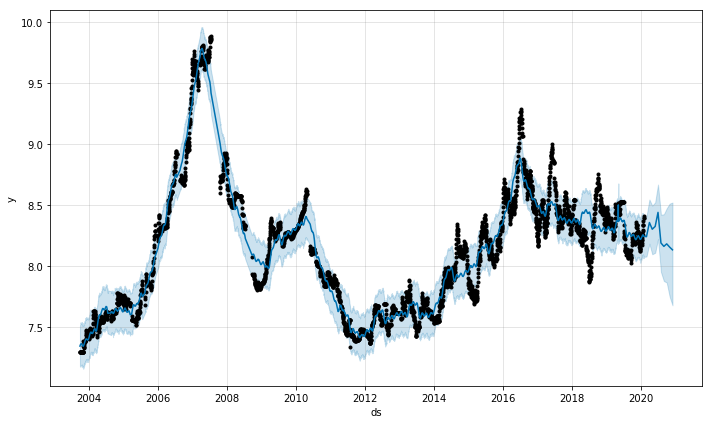

In [18]:
p.plot(forecast)

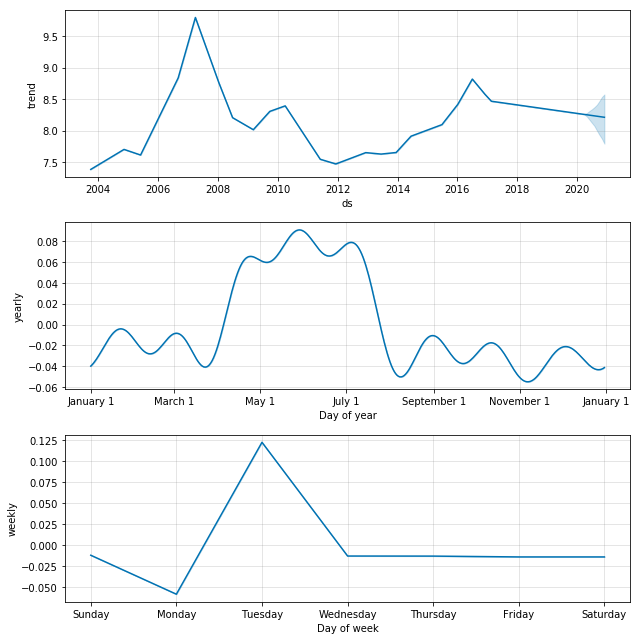

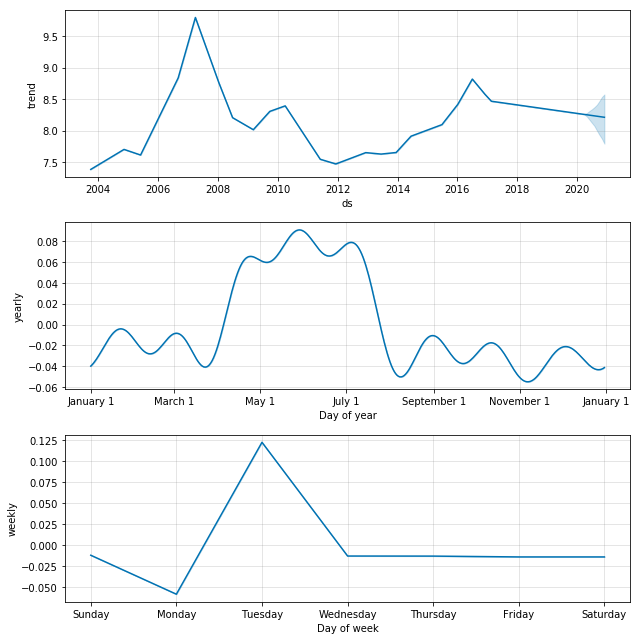

In [19]:
p.plot_components(forecast)